#Read data

In [44]:
import pandas as pd
df = pd.read_csv('./IMDB-Dataset.csv')
# Kiểm tra số lượng hàng bị lặp lại
duplicate_rows = df[df.duplicated()]
print(f"Số lượng sample bị lặp: {len(duplicate_rows)}")

df = df.drop_duplicates()
df.head()

Số lượng sample bị lặp: 418


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


#Preprocessing Data

In [8]:
!pip install contractions


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 6.7 MB/s eta 0:00:00


In [15]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
import contractions
from nltk import WordNetLemmatizer
from bs4 import BeautifulSoup
import re
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [5]:
stop = set(stopwords.words('english'))

In [10]:
#Mở rộng các từ viết tắt
#expanding contractions
def expand_contractions(text):
  return contractions.fix(text)

In [21]:
def preprocess_text(text):
    w1 = WordNetLemmatizer()  # Lemmatizer
    stop = set(stopwords.words('english'))  # Define stop words

    # Remove HTML tags
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()

    # Expand contractions (make sure you have defined this function)
    text = expand_contractions(text)

    # Remove emojis
    emoji_clean = re.compile("["
                             u"\U0001F600-\U0001F64F"  # Emotions
                             u"\U0001F300-\U0001F5FF"  # Symbols & pictographs
                             u"\U0001F680-\U0001F6FF"  # Transport & map symbols
                             u"\U0001F1E0-\U0001F1FF"  # Flags
                             u"\u2702-\u27B0"
                             "]+", flags=re.UNICODE)
    text = emoji_clean.sub(r'', text)

    # Add space after full stop if necessary
    text = re.sub(r'\.(?=\S)', '. ', text)

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove punctuation and make text lowercase
    text = "".join([char.lower() if char not in string.punctuation else " " for char in text])

    # Lemmatize and remove stop words
    text = " ".join([w1.lemmatize(word) for word in text.split() if word not in stop and word.isalpha()])

    return text

In [22]:
df['review'] = df['review'].apply(preprocess_text)

<ipython-input-21-4cfdbcbaf3b3>:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [45]:
# Tạo danh sách tất cả các từ sau khi đã áp dụng preprocess_text
all_words = df['review'].str.split().explode()

# Lấy kích thước bộ từ điển (số từ duy nhất)
unique_words = set(all_words)
vocab_size = len(unique_words)

print(f"Kích thước bộ từ điển: {vocab_size}")


Kích thước bộ từ điển: 438729


In [23]:
df.head()

,review,sentiment
0,one reviewer mentioned watching oz episode hoo...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake think zombie ...,negative
4,petter mattei love time money visually stunnin...,positive


#Data Analysis (Phân tích dữ liệu)

In [25]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
#tạo các chú thích (autocpt arguments) cho biểu đồ, thường là biểu đồ hình tròn (pie chart), với cả phần trăm và giá trị tuyệt đối của từng phần trong biểu đồ.
def func(pct, allvalues):
    absolute = int(pct/100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

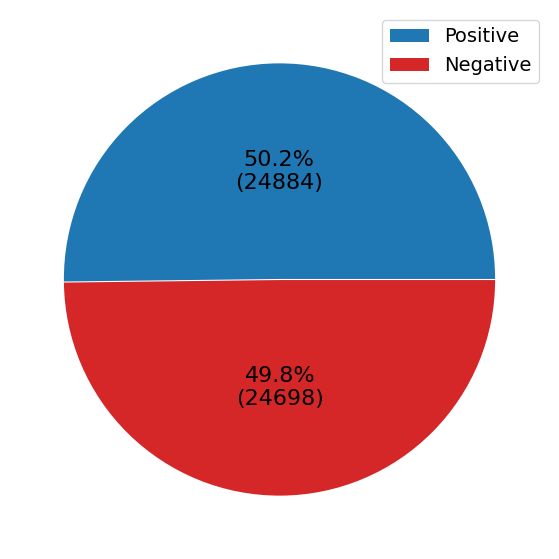

In [28]:
freq_pos = len(df[df['sentiment'] == 'positive'])
freq_neg = len(df[df['sentiment'] == 'negative'])
data = [ freq_pos , freq_neg ]
labels = ['positive', 'negative']
pie , ax = plt . subplots ( figsize =[11 ,7])
plt.pie(x=data , autopct = lambda pct: func (pct , data ) , explode =[0.0025]*2,
          pctdistance =0.5 , colors =[ sns.color_palette () [0] , 'tab:red'] , textprops ={'fontsize': 16})
labels = [r'Positive', r'Negative']
plt.legend(labels, loc = "best", prop={'size': 14})
pie.savefig("PieChart.png")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


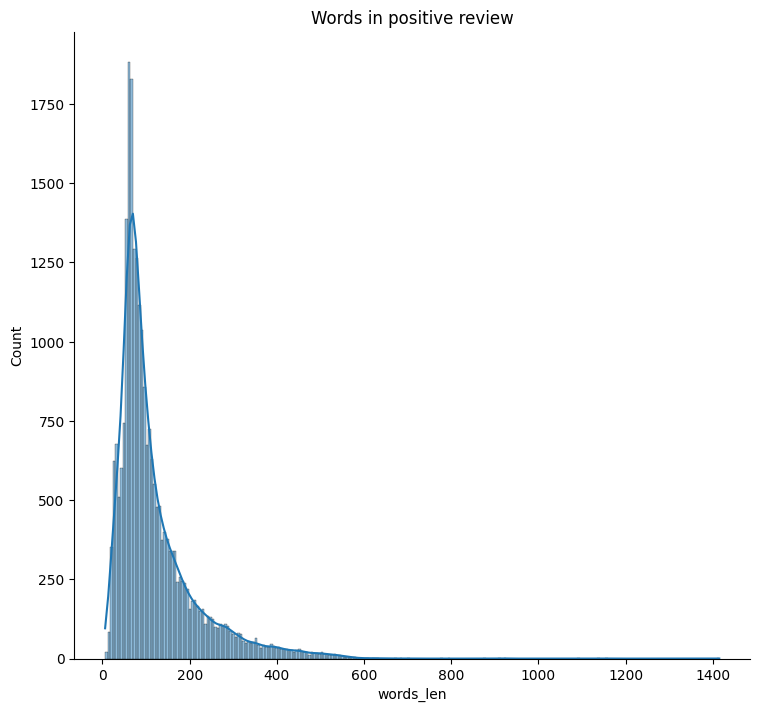

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


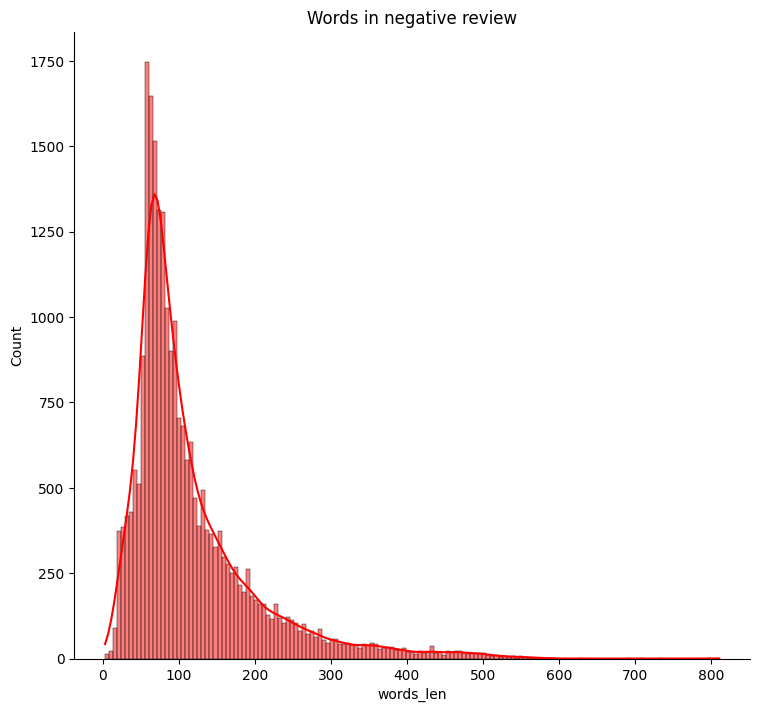

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


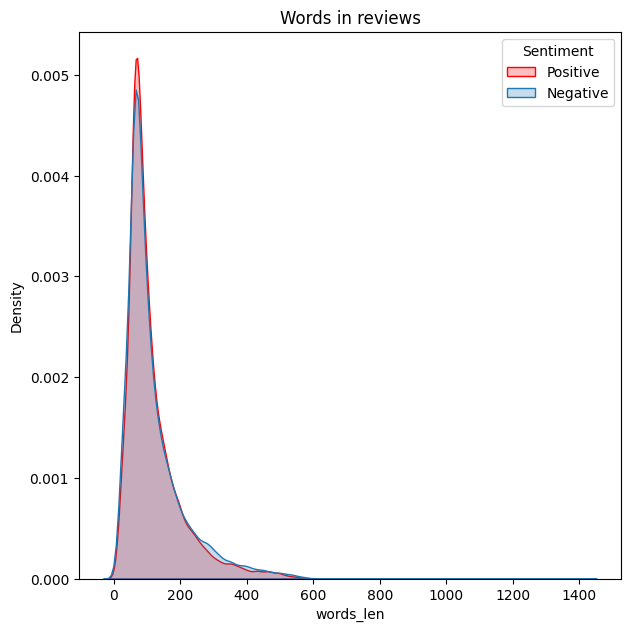

In [36]:
#Thống kê độ dài của các mẫu cho mỗi class.
words_len = df['review'].str.split().map(lambda x: len(x))
df_temp = df.copy()
df_temp['words_len'] = words_len
hist_positive = sns.displot(
    data = df_temp[df_temp['sentiment'] == 'positive'],
    x = 'words_len', hue = "sentiment", kde = True, height=7, aspect = 1.1, legend = False
).set(title = 'Words in positive review')
plt.show(hist_positive)

df_temp['words_len'] = words_len
hist_negative= sns.displot(
    data = df_temp[df_temp['sentiment'] == 'negative'],
    x = 'words_len', hue = "sentiment", kde = True, height=7, aspect = 1.1, legend = False, palette = ['red']
).set(title = 'Words in negative review')
plt.show(hist_negative)

plt.figure(figsize =(7,7.1))
kernel_distribution_number_words_plot = sns.kdeplot(
    data = df_temp , x="words_len", hue="sentiment", fill =True , palette =[ sns.color_palette ()[0] , 'red'] # removed leading and trailing space from " sentiment "
).set(title = 'Words in reviews')
plt.legend(title = "Sentiment", labels = ["Positive", "Negative"])
plt.show(kernel_distribution_number_words_plot)

#Split data

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder


In [39]:
label_encode = LabelEncoder()
y_data = label_encode.fit_transform(df['sentiment'])
X_train, X_test, y_train, y_test = train_test_split(df['review'], y_data, test_size=0.2, random_state=42)


#Convert to vector

In [40]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000) # chỉ 10.000 từ có trọng số TF-IDF cao nhất mới được giữ lại.
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

x_train_encoded = tfidf_vectorizer.fit_transform(X_train)
x_test_encoded = tfidf_vectorizer.transform(X_test)

#Train and evaluate model

Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



In [42]:
dt_classifier = DecisionTreeClassifier(
    criterion = 'entropy',
    random_state=42
)
dt_classifier.fit(X_train_tfidf, y_train)
y_pred = dt_classifier.predict(x_test_encoded)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.7071695069073308
              precision    recall  f1-score   support

           0       0.71      0.69      0.70      4939
           1       0.70      0.72      0.71      4978

    accuracy                           0.71      9917
   macro avg       0.71      0.71      0.71      9917
weighted avg       0.71      0.71      0.71      9917



Random forest

In [43]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(x_train_encoded, y_train)
y_pred = rf_classifier.predict(x_test_encoded)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.8416859937481093
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      4939
           1       0.84      0.84      0.84      4978

    accuracy                           0.84      9917
   macro avg       0.84      0.84      0.84      9917
weighted avg       0.84      0.84      0.84      9917

